In [75]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from itertools import combinations
from matplotlib import colors
from scipy.stats import pearsonr, zscore

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

In [76]:
#Datos de propiedades
ruta = 'https://raw.githubusercontent.com/rasief/cartografia/master/melb_data.csv'
df = pd.read_csv(ruta)
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [77]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [78]:
#Buscar nulos
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [79]:
#Borrado de datos nulos
df = df.dropna()
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.00,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.00,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.00,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.00,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.00,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12205,Whittlesea,30 Sherwin St,3,h,601000.0,S,Ray,29/07/2017,35.5,3757.0,...,2.0,1.0,972.0,149.00,1996.0,Whittlesea,-37.51232,145.13282,Northern Victoria,2170.0
12206,Williamstown,75 Cecil St,3,h,1050000.0,VB,Williams,29/07/2017,6.8,3016.0,...,1.0,0.0,179.0,115.00,1890.0,Hobsons Bay,-37.86558,144.90474,Western Metropolitan,6380.0
12207,Williamstown,2/29 Dover Rd,1,u,385000.0,SP,Williams,29/07/2017,6.8,3016.0,...,1.0,1.0,0.0,35.64,1967.0,Hobsons Bay,-37.85588,144.89936,Western Metropolitan,6380.0
12209,Windsor,201/152 Peel St,2,u,560000.0,PI,hockingstuart,29/07/2017,4.6,3181.0,...,1.0,1.0,0.0,61.60,2012.0,Stonnington,-37.85581,144.99025,Southern Metropolitan,4380.0


In [80]:
df = df.select_dtypes(exclude=['object'])
df

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.00,1900.0,-37.80790,144.99340,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.00,1900.0,-37.80930,144.99440,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.00,2014.0,-37.80720,144.99410,4019.0
6,3,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.00,1910.0,-37.80240,144.99930,4019.0
7,2,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.00,1890.0,-37.80600,144.99540,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12205,3,601000.0,35.5,3757.0,3.0,2.0,1.0,972.0,149.00,1996.0,-37.51232,145.13282,2170.0
12206,3,1050000.0,6.8,3016.0,3.0,1.0,0.0,179.0,115.00,1890.0,-37.86558,144.90474,6380.0
12207,1,385000.0,6.8,3016.0,1.0,1.0,1.0,0.0,35.64,1967.0,-37.85588,144.89936,6380.0
12209,2,560000.0,4.6,3181.0,2.0,1.0,1.0,0.0,61.60,2012.0,-37.85581,144.99025,4380.0


<Axes: >

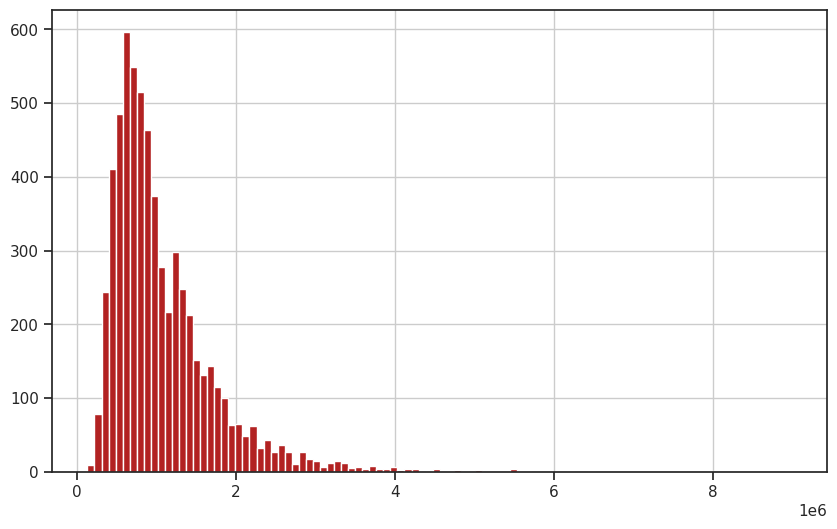

In [81]:
#Histograma
df.Price.hist(color='firebrick', bins=100, figsize=(10, 6))

<Axes: >

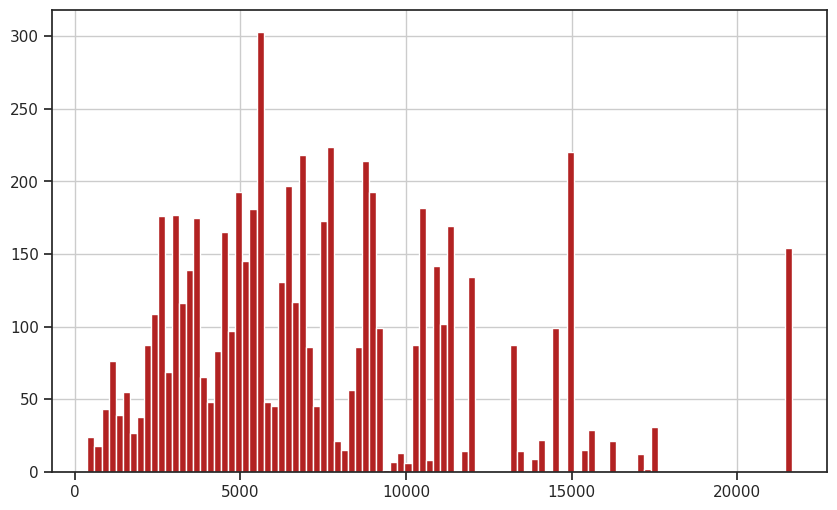

In [82]:
#Histograma
df.Propertycount.hist(color='firebrick', bins=100, figsize=(10, 6))

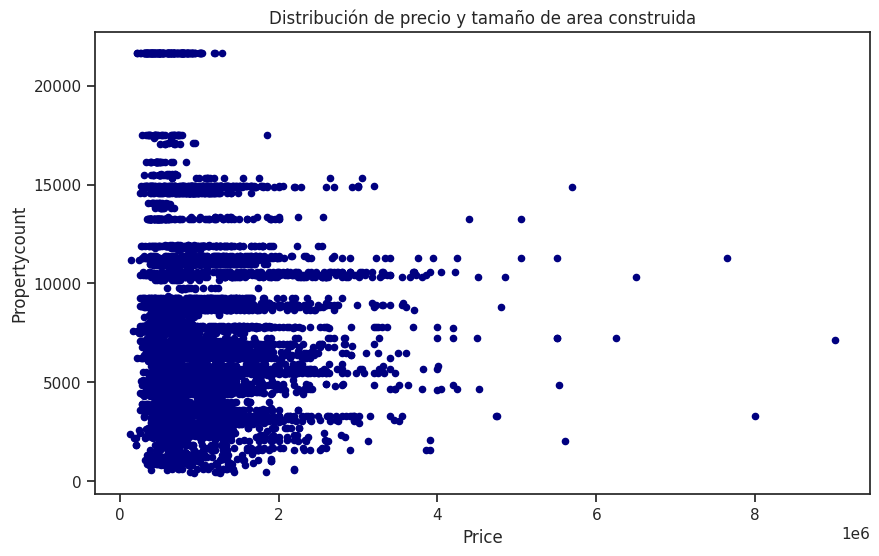

In [83]:
#Diagrama de distribución
fig, ax = plt.subplots(figsize=(10, 6))
df.plot(x = 'Price', y = 'Propertycount', c = 'navy', kind = "scatter", ax = ax)
ax.set_title('Distribución de precio y tamaño de area construida');

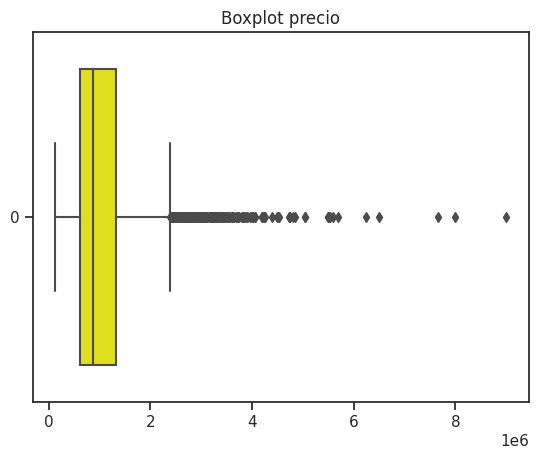

In [84]:
#Boxplot
ax = sb.boxplot(data=df['Price'].values, orient='h', color='yellow')
ax.set_title('Boxplot precio');
plt.show()

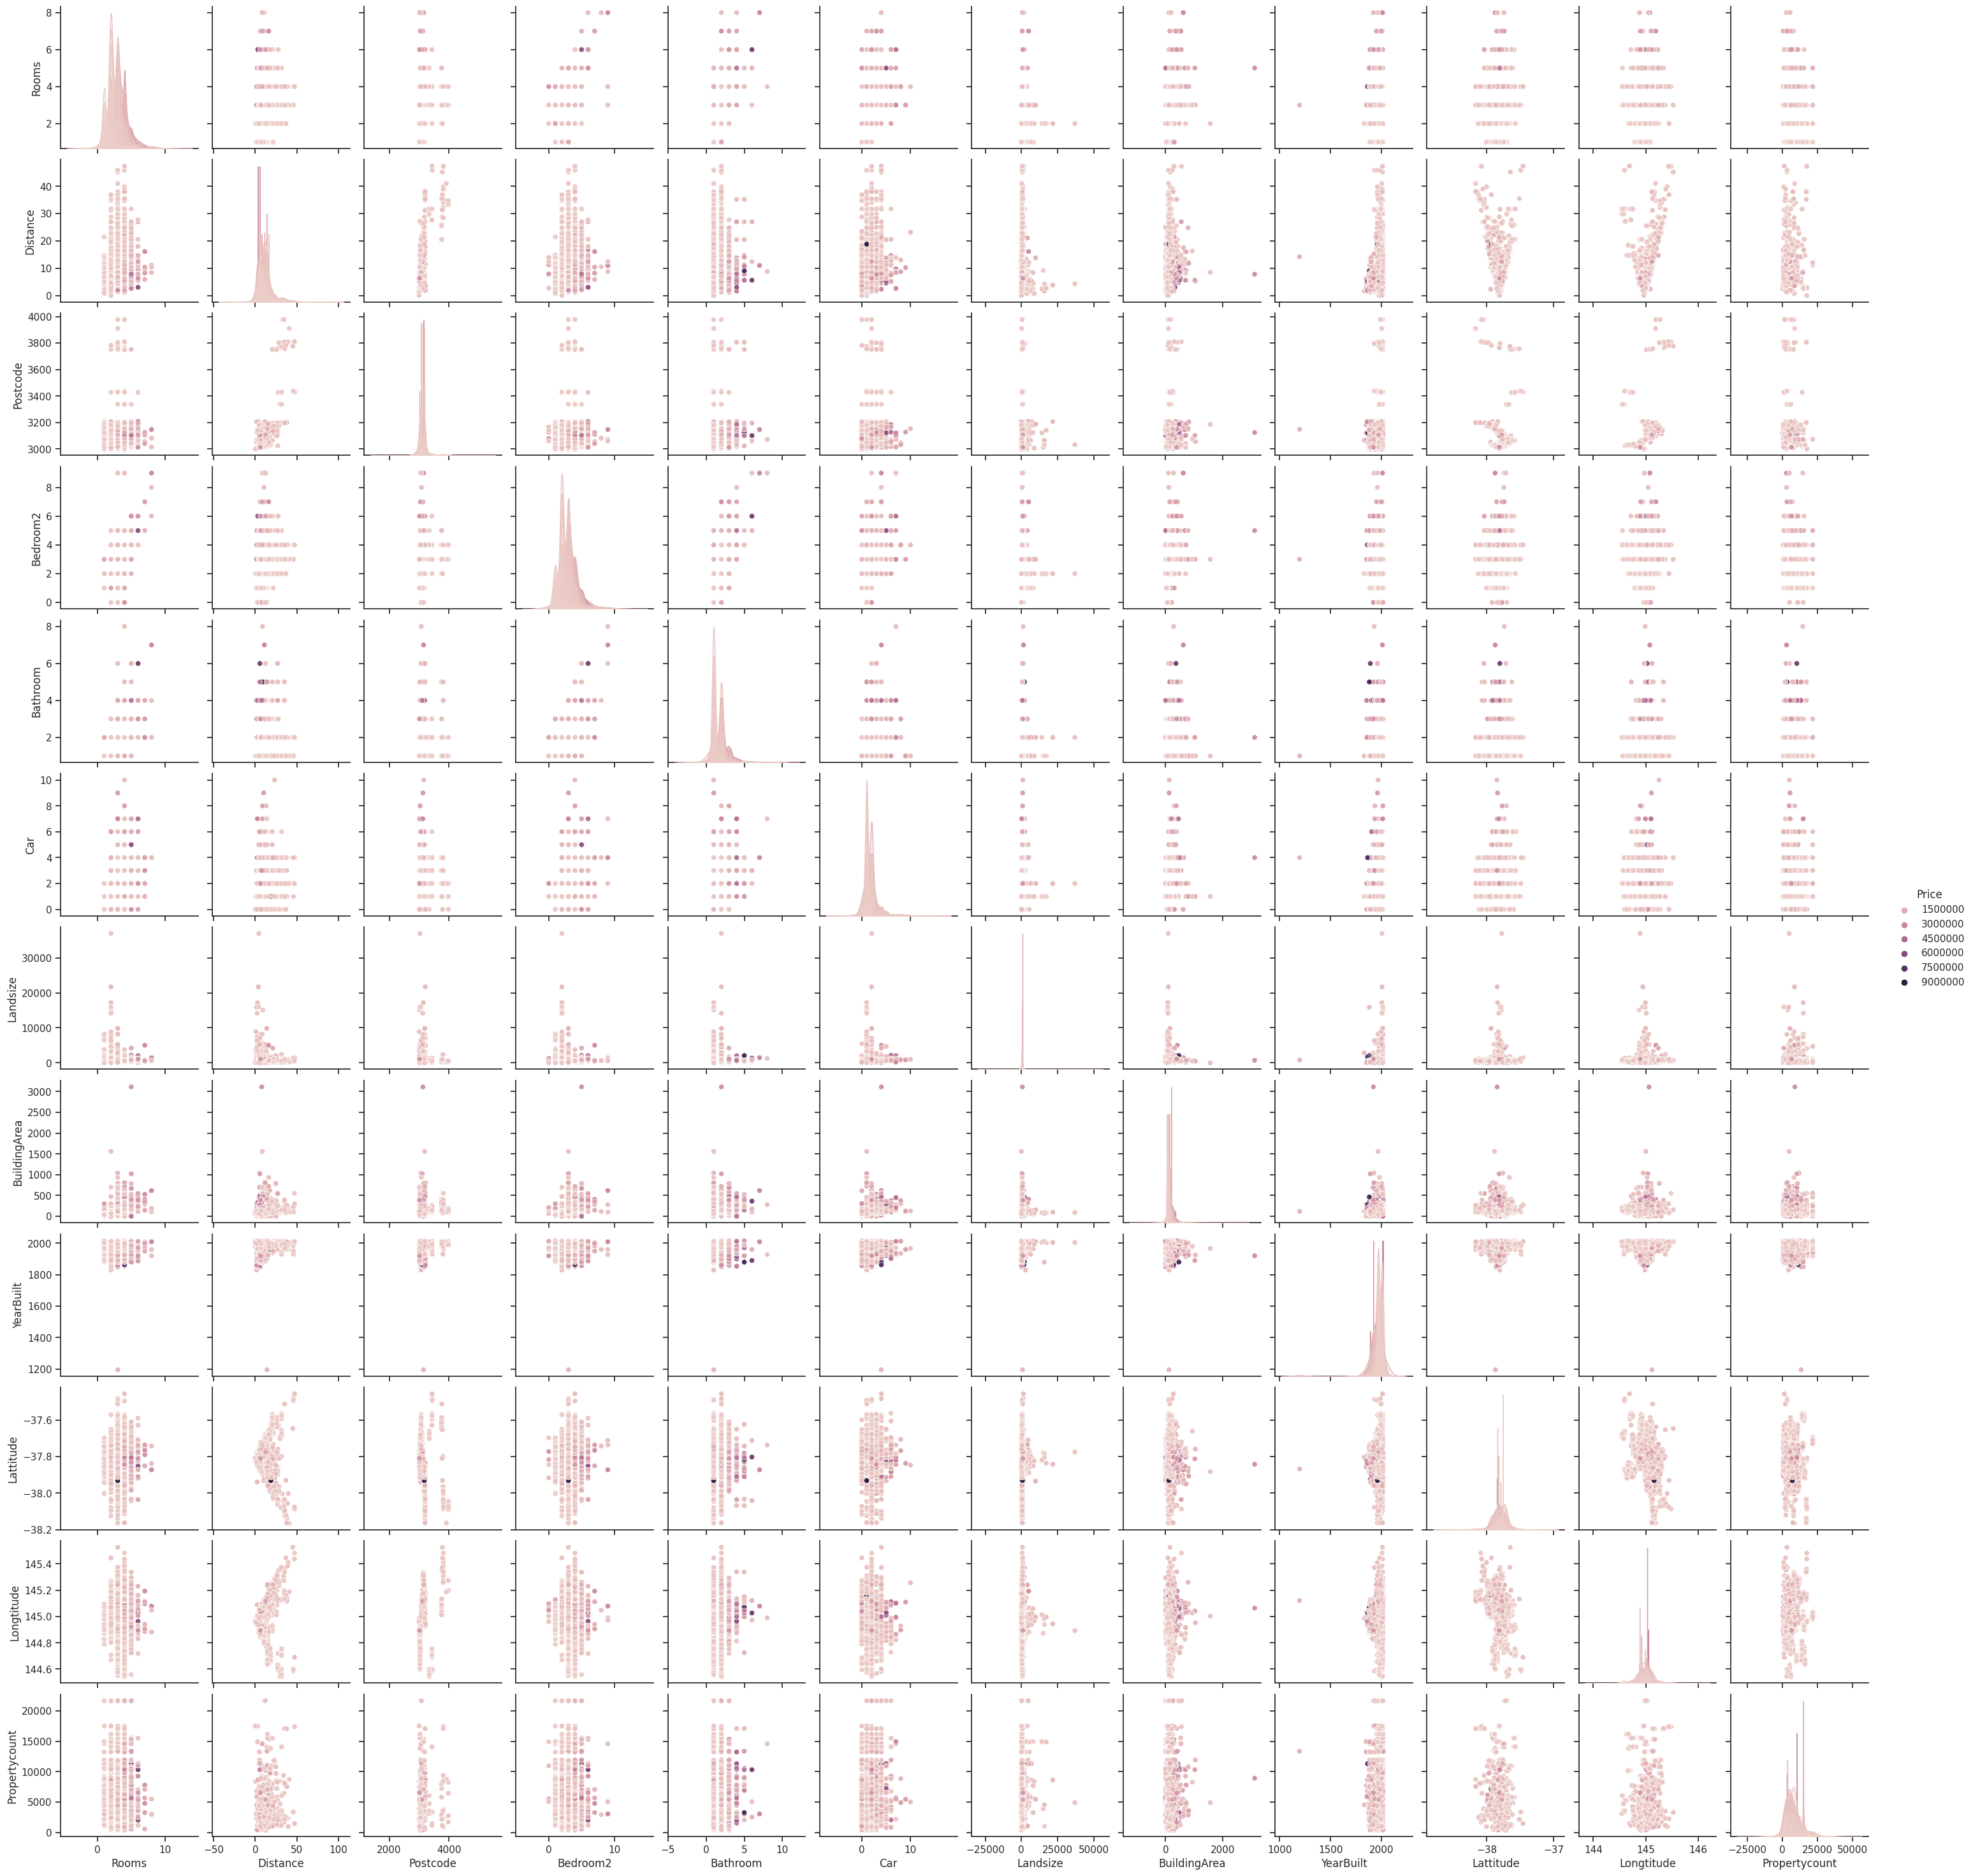

In [85]:
#Múltiples diagramas por parejas
sb.set_theme(style="ticks")
sb.pairplot(df, hue='Price')

In [86]:
#Datos con precio menor o igual a 1800000
df0 = df[df["Price"]<=1800000]
df0

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.00,1900.0,-37.80790,144.99340,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.00,1900.0,-37.80930,144.99440,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.00,2014.0,-37.80720,144.99410,4019.0
7,2,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.00,1890.0,-37.80600,144.99540,4019.0
9,2,1097000.0,2.5,3067.0,3.0,1.0,2.0,220.0,75.00,1900.0,-37.80100,144.99890,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12203,3,635000.0,16.5,3049.0,3.0,2.0,1.0,691.0,177.00,1975.0,-37.68026,144.88468,2474.0
12205,3,601000.0,35.5,3757.0,3.0,2.0,1.0,972.0,149.00,1996.0,-37.51232,145.13282,2170.0
12206,3,1050000.0,6.8,3016.0,3.0,1.0,0.0,179.0,115.00,1890.0,-37.86558,144.90474,6380.0
12207,1,385000.0,6.8,3016.0,1.0,1.0,1.0,0.0,35.64,1967.0,-37.85588,144.89936,6380.0


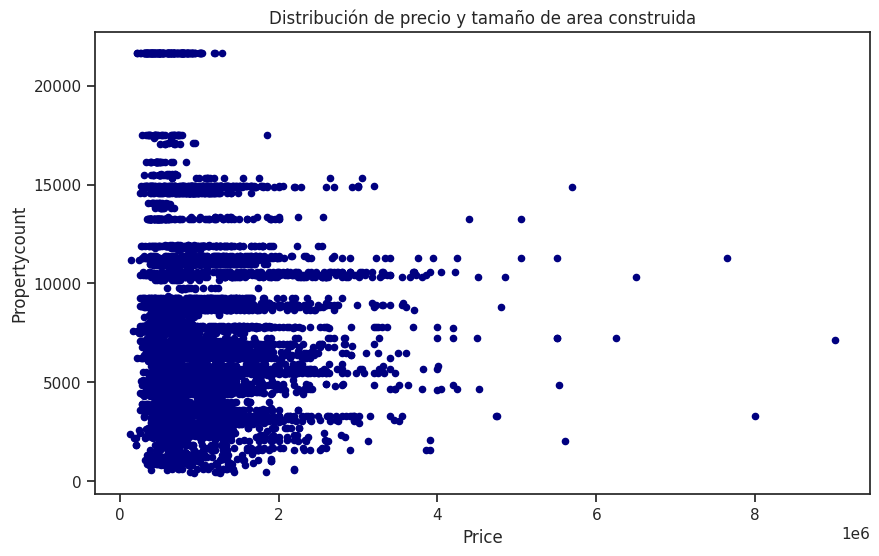

In [87]:
#Diagrama de distribución
fig, ax = plt.subplots(figsize=(10, 6))
df.plot(x = 'Price', y = 'Propertycount', c = 'navy', kind = "scatter", ax = ax)
ax.set_title('Distribución de precio y tamaño de area construida');

In [88]:
#Datos con área cero
dfzero = df0[df0["Propertycount"]<4]
len(dfzero)

0

In [89]:
#Se eliminan todos los datos que estén más allá de 3 desviaciones estándar
df0 = df0[(np.abs(zscore(df0['Propertycount']))<=4)]
df0

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.00,1900.0,-37.80790,144.99340,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.00,1900.0,-37.80930,144.99440,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.00,2014.0,-37.80720,144.99410,4019.0
7,2,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.00,1890.0,-37.80600,144.99540,4019.0
9,2,1097000.0,2.5,3067.0,3.0,1.0,2.0,220.0,75.00,1900.0,-37.80100,144.99890,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12203,3,635000.0,16.5,3049.0,3.0,2.0,1.0,691.0,177.00,1975.0,-37.68026,144.88468,2474.0
12205,3,601000.0,35.5,3757.0,3.0,2.0,1.0,972.0,149.00,1996.0,-37.51232,145.13282,2170.0
12206,3,1050000.0,6.8,3016.0,3.0,1.0,0.0,179.0,115.00,1890.0,-37.86558,144.90474,6380.0
12207,1,385000.0,6.8,3016.0,1.0,1.0,1.0,0.0,35.64,1967.0,-37.85588,144.89936,6380.0


In [90]:
#Correlación entre variables
corr_test = pearsonr(x = df['Price'], y = df['Propertycount'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  -0.046409905399040705
P-value:  0.00025781166783430277


<Axes: title={'center': 'Pearson Correlation of Features'}>

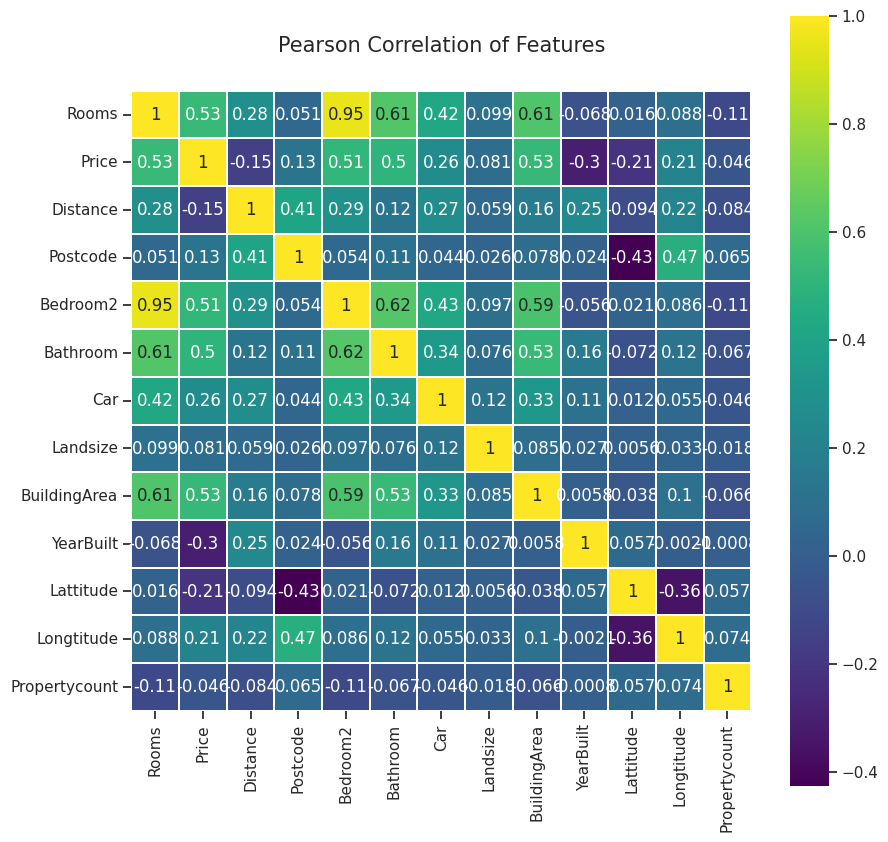

In [91]:
colormap = plt.cm.viridis
plt.figure(figsize=(10, 10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

Text(0.5, 1.0, 'Distribución de precio y propiedades construidas')

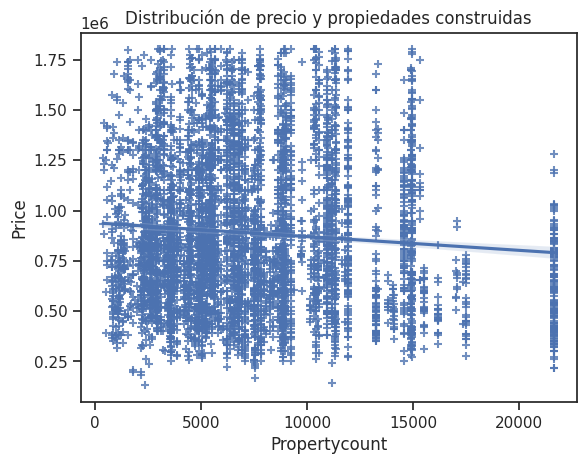

In [92]:
sb.set_theme(color_codes=True)
sb.set_theme(style="ticks")
ax = sb.regplot(x="Propertycount", y="Price", data=df0, marker='+', x_jitter=0.2, y_jitter=0.2)
ax.set_title('Distribución de precio y propiedades construidas')

In [93]:
#Regresión lineal (Propiedad construida vs. Precio)
x = df0["BuildingArea"]
y = df0["Price"]
x2 = sm.add_constant(x)
est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     1342.
Date:                Sat, 19 Aug 2023   Prob (F-statistic):          3.83e-263
Time:                        14:39:28   Log-Likelihood:                -77807.
No. Observations:                5501   AIC:                         1.556e+05
Df Residuals:                    5499   BIC:                         1.556e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         5.828e+05   9480.520     61.478   

In [94]:
df0.dtypes

Rooms              int64
Price            float64
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
Lattitude        float64
Longtitude       float64
Propertycount    float64
dtype: object

In [95]:
#Regresión lineal múltiple
x = df0.iloc[:,[0,5,8]]
y = df0["Price"]
x2 = sm.add_constant(x)
est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     739.1
Date:                Sat, 19 Aug 2023   Prob (F-statistic):               0.00
Time:                        14:39:28   Log-Likelihood:                -77476.
No. Observations:                5501   AIC:                         1.550e+05
Df Residuals:                    5497   BIC:                         1.550e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.892e+05   1.43e+04     20.295   

In [96]:
df0.drop(columns={'Bedroom2', 'Postcode', 'Lattitude', 'Longtitude'}, inplace=True)
df0

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
1,2,1035000.0,2.5,1.0,0.0,156.0,79.00,1900.0,4019.0
2,3,1465000.0,2.5,2.0,0.0,134.0,150.00,1900.0,4019.0
4,4,1600000.0,2.5,1.0,2.0,120.0,142.00,2014.0,4019.0
7,2,1636000.0,2.5,1.0,2.0,256.0,107.00,1890.0,4019.0
9,2,1097000.0,2.5,1.0,2.0,220.0,75.00,1900.0,4019.0
...,...,...,...,...,...,...,...,...,...
12203,3,635000.0,16.5,2.0,1.0,691.0,177.00,1975.0,2474.0
12205,3,601000.0,35.5,2.0,1.0,972.0,149.00,1996.0,2170.0
12206,3,1050000.0,6.8,1.0,0.0,179.0,115.00,1890.0,6380.0
12207,1,385000.0,6.8,1.0,1.0,0.0,35.64,1967.0,6380.0


In [97]:
mi_lista=[0,2,3,4,5,6,7,8]
combinaciones = list(combinations(mi_lista, 3))
combinaciones

[(0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 2, 6),
 (0, 2, 7),
 (0, 2, 8),
 (0, 3, 4),
 (0, 3, 5),
 (0, 3, 6),
 (0, 3, 7),
 (0, 3, 8),
 (0, 4, 5),
 (0, 4, 6),
 (0, 4, 7),
 (0, 4, 8),
 (0, 5, 6),
 (0, 5, 7),
 (0, 5, 8),
 (0, 6, 7),
 (0, 6, 8),
 (0, 7, 8),
 (2, 3, 4),
 (2, 3, 5),
 (2, 3, 6),
 (2, 3, 7),
 (2, 3, 8),
 (2, 4, 5),
 (2, 4, 6),
 (2, 4, 7),
 (2, 4, 8),
 (2, 5, 6),
 (2, 5, 7),
 (2, 5, 8),
 (2, 6, 7),
 (2, 6, 8),
 (2, 7, 8),
 (3, 4, 5),
 (3, 4, 6),
 (3, 4, 7),
 (3, 4, 8),
 (3, 5, 6),
 (3, 5, 7),
 (3, 5, 8),
 (3, 6, 7),
 (3, 6, 8),
 (3, 7, 8),
 (4, 5, 6),
 (4, 5, 7),
 (4, 5, 8),
 (4, 6, 7),
 (4, 6, 8),
 (4, 7, 8),
 (5, 6, 7),
 (5, 6, 8),
 (5, 7, 8),
 (6, 7, 8)]

In [98]:
df0

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
1,2,1035000.0,2.5,1.0,0.0,156.0,79.00,1900.0,4019.0
2,3,1465000.0,2.5,2.0,0.0,134.0,150.00,1900.0,4019.0
4,4,1600000.0,2.5,1.0,2.0,120.0,142.00,2014.0,4019.0
7,2,1636000.0,2.5,1.0,2.0,256.0,107.00,1890.0,4019.0
9,2,1097000.0,2.5,1.0,2.0,220.0,75.00,1900.0,4019.0
...,...,...,...,...,...,...,...,...,...
12203,3,635000.0,16.5,2.0,1.0,691.0,177.00,1975.0,2474.0
12205,3,601000.0,35.5,2.0,1.0,972.0,149.00,1996.0,2170.0
12206,3,1050000.0,6.8,1.0,0.0,179.0,115.00,1890.0,6380.0
12207,1,385000.0,6.8,1.0,1.0,0.0,35.64,1967.0,6380.0


In [99]:
mejor_r2 = 0
columnas = []
for combinacion in combinaciones:
  x = df0.iloc[:,list(combinacion)]
  y = df0["Price"]
  x2 = sm.add_constant(x)
  est = sm.OLS(y, x2)
  est2 = est.fit()
  #print(est2.summary())
  if est2.rsquared > mejor_r2:
    mejor_r2 = est2.rsquared
    columnas = list(combinacion)

print("Mejor R^2:", mejor_r2)
print("Columnas:", columnas)

Mejor R^2: 0.4337501822473323
Columnas: [0, 2, 7]


In [100]:
#Regresión lineal múltiple
x = df0.iloc[:,[0,2,7]]
y = df0["Price"]
x2 = sm.add_constant(x)
est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     1404.
Date:                Sat, 19 Aug 2023   Prob (F-statistic):               0.00
Time:                        14:39:29   Log-Likelihood:                -76844.
No. Observations:                5501   AIC:                         1.537e+05
Df Residuals:                    5497   BIC:                         1.537e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         5.9e+06   2.11e+05     27.996      0.0